## todo
- record exe name and associate with pid
- test generating sums from separate process records in pandas

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv("../AnnoPred/monitor.out", sep='\t')

In [13]:
df.head(30)

,timestamp,pid,cpu,rss,vms,rchar,wchar
0,0.023163,206627,0.0,1654784,116072448,1.331700e+04,65.0
1,5.061723,206627,0.0,1822720,116072448,4.207947e+06,13709.0
2,5.061723,206658,98.8,754147328,1381867520,3.179598e+08,127924.0
3,10.100074,206627,0.0,1822720,116072448,4.207947e+06,13709.0
4,10.100074,206658,98.8,923623424,1567150080,3.179598e+08,127924.0
5,15.138220,206627,0.0,1822720,116072448,4.207947e+06,13709.0
6,15.138220,206658,98.8,697581568,1305358336,5.648011e+08,688150.0
7,20.176450,206627,0.0,1822720,116072448,4.207947e+06,13709.0
8,20.176450,206658,98.8,363212800,978104320,7.025455e+08,1264320.0
9,25.214714,206627,0.0,1822720,116072448,4.207947e+06,13709.0


In [14]:
df['rss']=df['rss']/(2**30)
df['vms']=df['vms']/(2**30)
df['rchar']=df['rchar']/(2**20)
df['wchar']=df['wchar']/(2**20)

In [15]:
df.head()

,timestamp,pid,cpu,rss,vms,rchar,wchar
0,0.023163,206627,0.0,0.001541,0.108101,0.012700,0.000062
1,5.061723,206627,0.0,0.001698,0.108101,4.013011,0.013074
2,5.061723,206658,98.8,0.702354,1.286964,303.230057,0.121998
3,10.100074,206627,0.0,0.001698,0.108101,4.013011,0.013074
4,10.100074,206658,98.8,0.860191,1.459522,303.230057,0.121998


In [16]:
sumdf=df.groupby('timestamp')[['cpu','rss','vms','rchar','wchar']].sum()

In [17]:
sumdf.head()

,cpu,rss,vms,rchar,wchar
timestamp,,,,,
0.023163,0.0,0.001541,0.108101,0.012700,0.000062
5.061723,98.8,0.704052,1.395065,307.243068,0.135072
10.100074,98.8,0.861889,1.567623,307.243068,0.135072
15.138220,98.8,0.651371,1.323811,542.649318,0.669345
20.176450,98.8,0.339966,1.019032,674.012567,1.218823


<IPython.core.display.Javascript object>


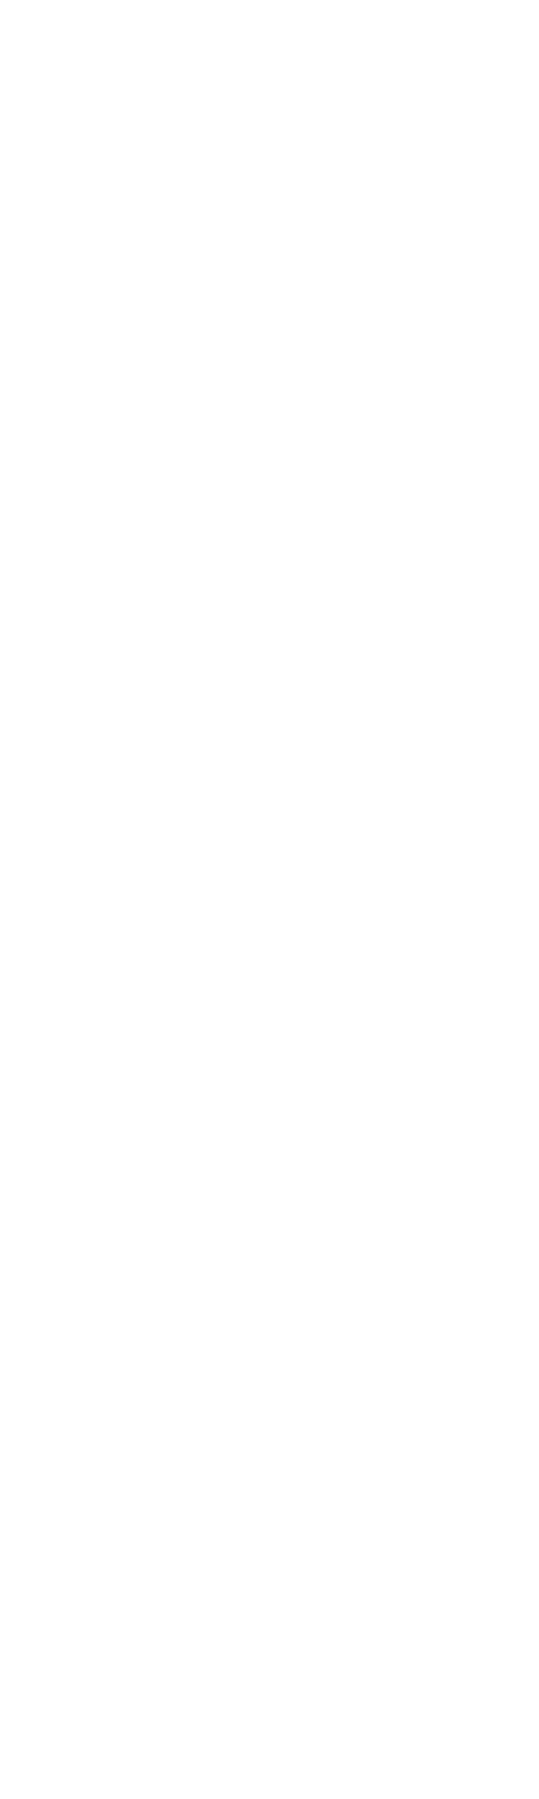

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

sumdf.plot(y='cpu', ax=axes[0])  
sumdf.plot(y='rss', ax=axes[1])  
sumdf.plot(y='vms', ax=axes[1])  
sumdf.plot(y='rchar', ax=axes[2])  
sumdf.plot(y='wchar', ax=axes[2]) 

axes[0].set(xlabel="Sec", ylabel="Percentage", title="CPU")
axes[1].set(xlabel="Sec", ylabel="GiB", title="Memory")
axes[2].set(xlabel="Sec", ylabel="MB/sec", title="I/O")

fig.subplots_adjust(hspace=0.3, wspace=0.3)

#df.pivot(index='timestamp', columns='pid', values='cpu').plot(ax=axes[0,1], stacked=True)
#df.pivot(index='timestamp', columns='pid', values='rss').plot(ax=axes[1,1], stacked=True)
#df.pivot(index='timestamp', columns='pid', values='wchar').plot(ax=axes[2,1], stacked=True)

#axes[0,1].set(xlabel="Sec", ylabel="Percentage", title="CPU")
#axes[1,1].set(xlabel="Sec", ylabel="GiB", title="RSS")
#axes[2,1].set(xlabel="Sec", ylabel="MB/sec", title="wchar")



In [19]:
%matplotlib notebook

<IPython.core.display.Javascript object>


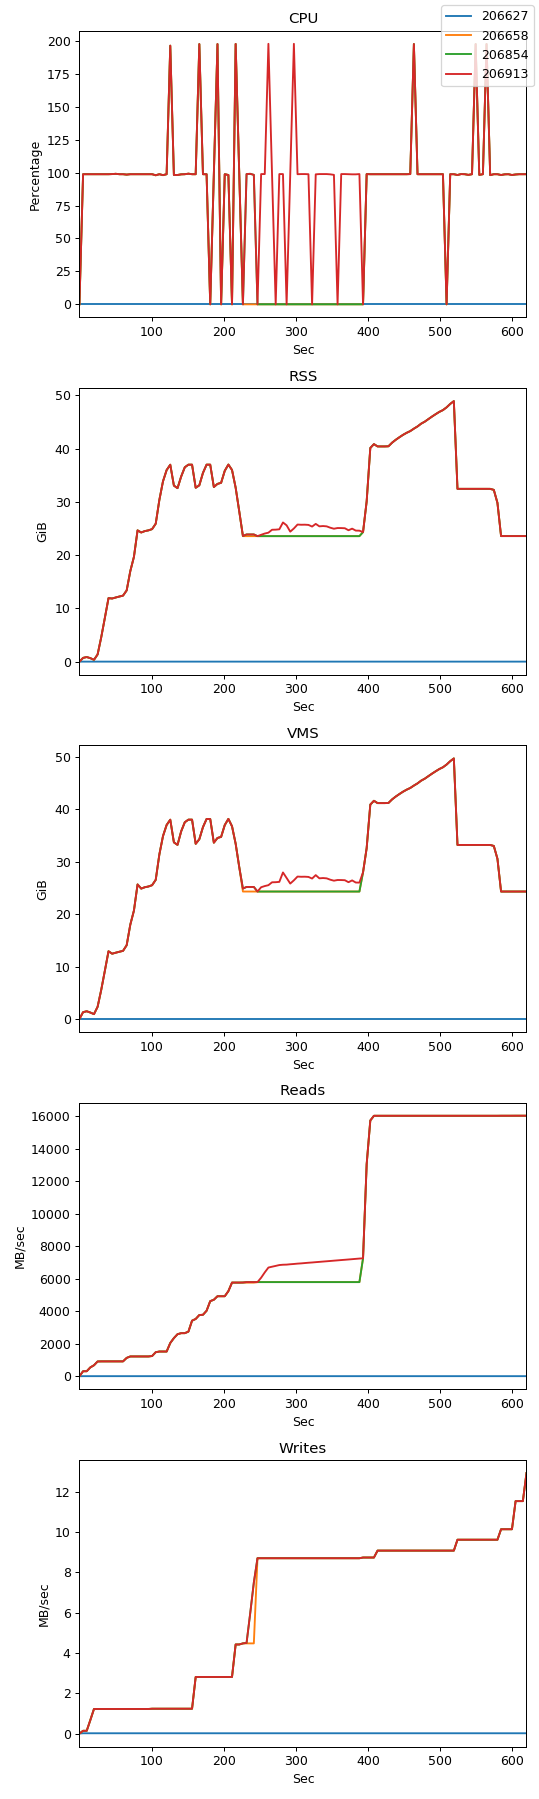

In [20]:
# https://stackoverflow.com/questions/48744165/uneven-subplot-in-python
# https://matplotlib.org/3.3.3/tutorials/intermediate/gridspec.html


fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

#maindf['cpu'].plot(x='timestamp', ax=axes[0,0], label='cpu') 
#maindf['rss'].plot(x='timestamp', secondary_y='rss', ax=axes[0,0]) 

p1=df.pivot(index='timestamp', columns='pid', values='cpu').plot(ax=axes[0], stacked=True, legend=0)
p2=df.pivot(index='timestamp', columns='pid', values='rss').plot(ax=axes[1], stacked=True, legend=0)
p3=df.pivot(index='timestamp', columns='pid', values='vms').plot(ax=axes[2], stacked=True, legend=0)
p4=df.pivot(index='timestamp', columns='pid', values='rchar').plot(ax=axes[3], stacked=True, legend=0)
p5=df.pivot(index='timestamp', columns='pid', values='wchar').plot(ax=axes[4], stacked=True, legend=0)

#fig.legend((p1,p2,p3,p4,p5), ('1','2','3','4','5'), 'upper left')

#axes[0,0].set(xlabel="Sec", ylabel="Percentage", title="CPU vs RSS")
axes[0].set(xlabel="Sec", ylabel="Percentage", title="CPU")
axes[1].set(xlabel="Sec", ylabel="GiB", title="RSS")
axes[2].set(xlabel="Sec", ylabel="GiB", title="VMS")
axes[3].set(xlabel="Sec", ylabel="MB/sec", title="Reads")
axes[4].set(xlabel="Sec", ylabel="MB/sec", title="Writes")

handles, labels = axes[4].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
fig.tight_layout()


https://pstblog.com/2016/10/04/stacked-charts
    